<a href="https://colab.research.google.com/github/MrMRaut/NEWS-POPULARITY-REGRESSION-MODEL/blob/main/Airline_Referral_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual

# **Project Summary -**

Classification machine learning project focused on predicting whether airline passengers will recommend the airline to their friends. The dataset comprises airline reviews spanning the years 2006 to 2019, covering various popular airlines worldwide. The data, scraped in Spring 2019, includes both multiple choice and free-text questions from passengers. The primary goal of this project is to develop a robust classification model that can accurately predict whether a passenger is likely to refer the airline to others.





# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [ ]:
#pip install pycaret

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df = pd.read_excel(r'/content/drive/MyDrive/Database/data_airline_reviews.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df1 = df.copy()
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print(f'''
Number of rows = {df.shape[0]}
Number of columns = {df.shape[1]}
''')


Number of rows = 131895
Number of columns = 17



### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(df[df.duplicated()].index, axis = 0, inplace = True)
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df1 = pd.DataFrame(round((df.isnull().sum()/len(df))*100, 2).sort_values(ascending = False)
                  , columns = ['Null values in %'])

df1

,Null values in %
aircraft,69.78
ground_service,39.25
date_flown,38.82
route,38.69
traveller_type,38.64
entertainment,34.25
food_bev,20.99
seat_comfort,8.13
cabin_service,8.08
cabin,4.05


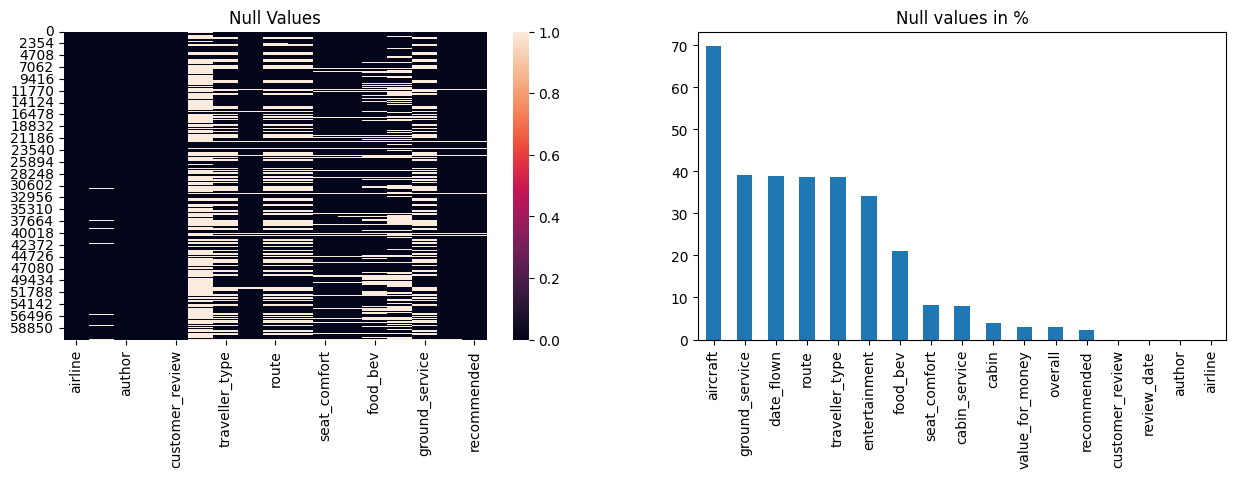

In [ ]:
# Visualizing the missing values
plt.subplot(1,2,1)
sns.heatmap(df.isnull())

plt.title('Null Values')

from matplotlib import pyplot as plt
plt.subplot(1,2,2)
df1['Null values in %'].plot(kind='bar', figsize=(15, 4), title='Null values in %')
plt.show()


### What did you know about your dataset?


- Features containing null values from 70% to 20% which needs to be imputed before ML modelling.
- Most of the columns have categorical data.
- A feature named 'customer_review' has textual type of data.Natural Language tool kit will be needed/rquired to treat this feature.
- The dataset also has time series feature which can be ustilized for time series analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(df.columns)

['airline',
 'overall',
 'author',
 'review_date',
 'customer_review',
 'aircraft',
 'traveller_type',
 'cabin',
 'route',
 'date_flown',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'entertainment',
 'ground_service',
 'value_for_money',
 'recommended']

In [ ]:
# Dataset Describe
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description

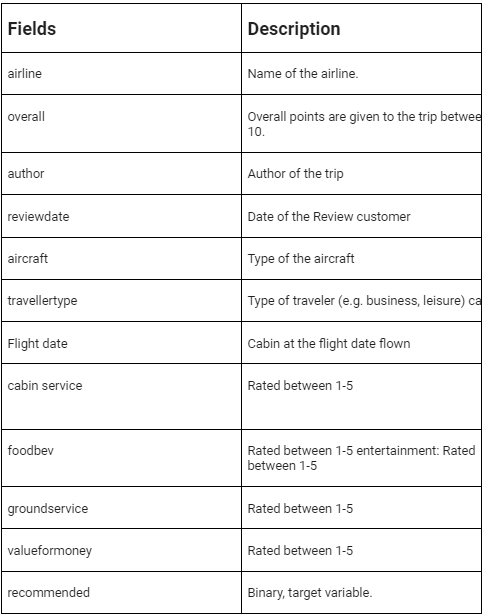

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
lst  = [len(list(df[f'{i}'].unique())) for i in df.columns]
pd.DataFrame(zip(df.columns, lst), columns = ['Column Name', "Unique Value Count"])

,Column Name,Unique Value Count
0,airline,82
1,overall,11
2,author,44070
3,review_date,3016
4,customer_review,61173
5,aircraft,2089
6,traveller_type,5
7,cabin,5
8,route,24550
9,date_flown,64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
3,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
4,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes


In [ ]:
# dropping first row since all the values are null in it
df.drop(df[:1].index, axis = 0, inplace = True)


In [ ]:
df.review_date = pd.to_datetime(df.review_date)
pd.date_flown = pd.to_datetime(df.date_flown).describe()

df.review_date.describe()

count                   61183
unique                   3015
top       2015-01-19 00:00:00
freq                      198
first     2002-08-25 00:00:00
last      2019-06-29 00:00:00
Name: review_date, dtype: object

In [ ]:
# The given data must from 2016 to 2019, anything outside this time zone is an impure data.
print(df[df.review_date < pd.to_datetime('2006-01-1 00:00:00')].shape)

df.drop(df[df.review_date < pd.to_datetime('2006-01-1 00:00:00')].index, axis = 0, inplace = True)
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

(21, 17)


In [ ]:
# dropping the aircraft feature since 70% of its data are null values
df.drop('aircraft', axis = 1, inplace = True)

In [ ]:
# Dropping route m date_flown and author features since the are irrelevent.
df.drop(['author', 'route', 'date_flown'], axis = 1, inplace = True)

In [ ]:
dfw = df.copy()

### What all manipulations have you done and insights you found?


1.   Dropping dates that does not belong from the given timeline.
2.   Dropping aircraft since 70% of its data is missing.
3.   Dropping route and author features since they are irrelevent.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
plt.rcParams['figure.figsize'] = [15,5]

#### Chart - 1

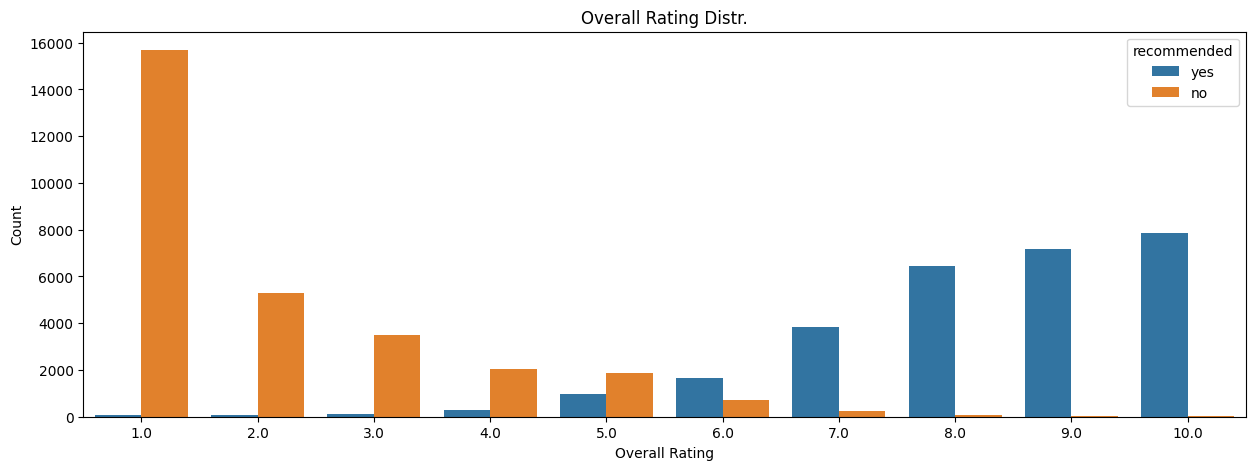

In [ ]:
# Chart - 1 visualization code

sns.countplot(x = df.overall, hue = df.recommended)

plt.title('Overall Rating Distr.')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()



- The above bar chart proves the most obvious point that the people how who give less rating are more likely to not recommend the airline.



#### Chart - 2

In [ ]:
temp = df.groupby('traveller_type')['seat_comfort',	'cabin_service',	'food_bev',	'entertainment',	'ground_service',	'value_for_money'].mean()

In [ ]:
temp

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
traveller_type,,,,,,
Business,2.815212,3.058761,2.740353,2.750625,2.617735,2.625407
Couple Leisure,2.672804,2.963430,2.697708,2.782134,2.559405,2.655222
Family Leisure,2.713915,2.960728,2.726238,2.814699,2.554802,2.640997
Solo Leisure,3.001255,3.275181,3.028380,3.013535,2.862550,2.972007


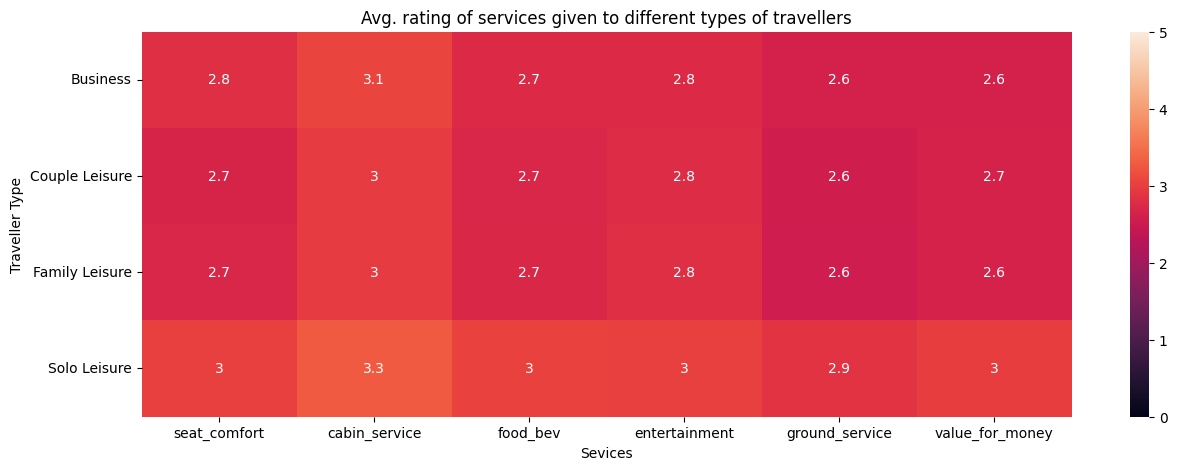

In [ ]:
sns.heatmap(temp, annot=True, vmax=5, vmin=0)

plt.title('Avg. rating of services given to different types of travellers')
plt.ylabel('Traveller Type')
plt.xlabel('Sevices')
plt.show()

- Above heatmap is perfect to descibe the key areas to improve or work on, on sevices for different types of travellers.
- Most of the services provided by all airlines do score average
 with few scoring below average.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
temp = df.groupby('cabin')['seat_comfort',	'cabin_service',	'food_bev',	'entertainment',	'ground_service',	'value_for_money'].mean()

In [ ]:
temp


,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
cabin,,,,,,
Business Class,3.621666,3.855782,3.525108,3.356407,3.401077,3.503296
Economy Class,2.792234,3.045822,2.776919,2.758083,2.503103,2.828056
First Class,3.737727,3.778077,3.384295,3.280827,3.379085,3.365598
Premium Economy,3.101946,3.298052,2.919603,3.038980,3.042809,2.968905


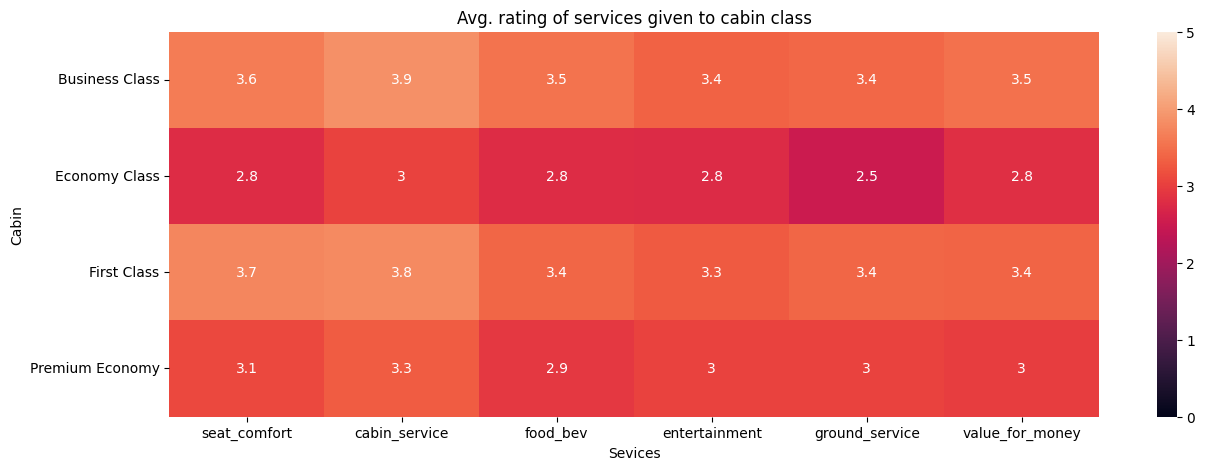

In [ ]:
sns.heatmap(temp, annot=True, vmax=5, vmin=0)

plt.title('Avg. rating of services given to cabin class')
plt.ylabel('Cabin')
plt.xlabel('Sevices')
plt.show()

- This heatmap describes the performance of all services provided for different classes.
- Ground services of economy class has the lowest of rating among all.



#### Chart - 4

<Axes: xlabel='review_date', ylabel='count'>

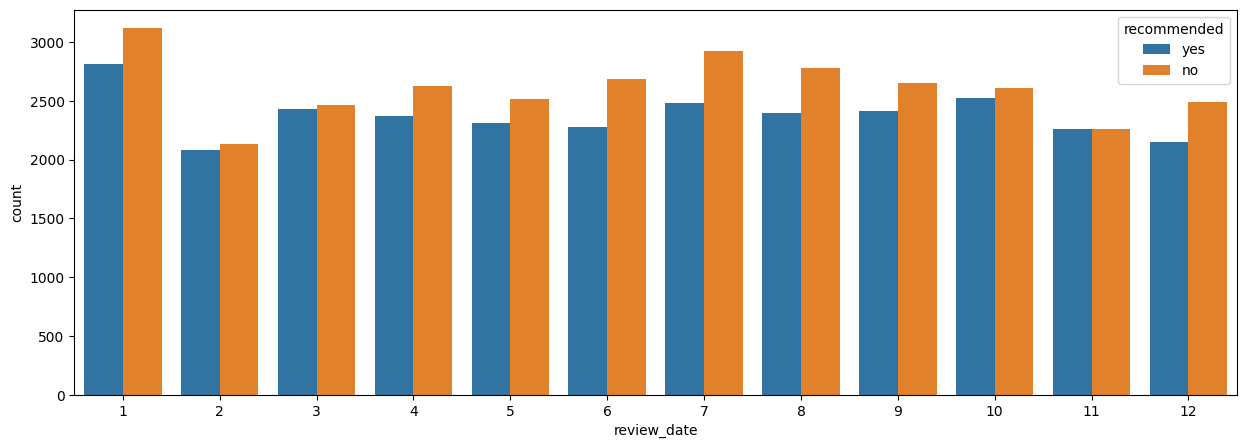

In [ ]:
# Chart - 4 visualization code
sns.countplot(x = df.review_date.dt.month, hue = df.recommended)

- Monthly Destribution of tickets sold and referrals.

#### Chart - 5

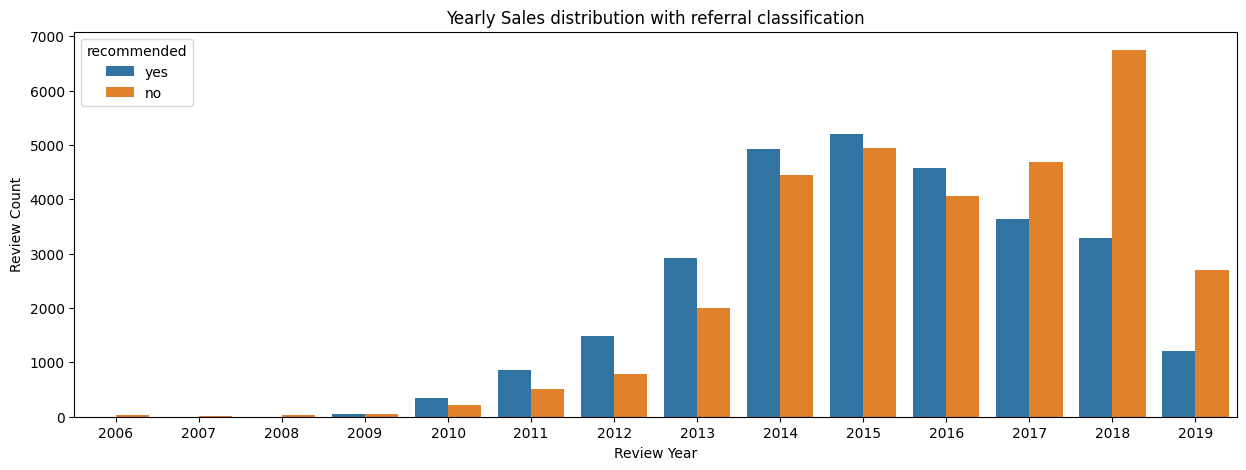

In [ ]:
# Chart - 5 visualization code
sns.countplot(x = df.review_date.dt.year, hue = df.recommended)

plt.title('Yearly Sales distribution with referral classification')
plt.xlabel('Review Year')
plt.ylabel('Review Count')
plt.show()

- Yearly Sales distribution with referral classification.
- A huge spike can seen in sales after 2011

#### Chart - 6

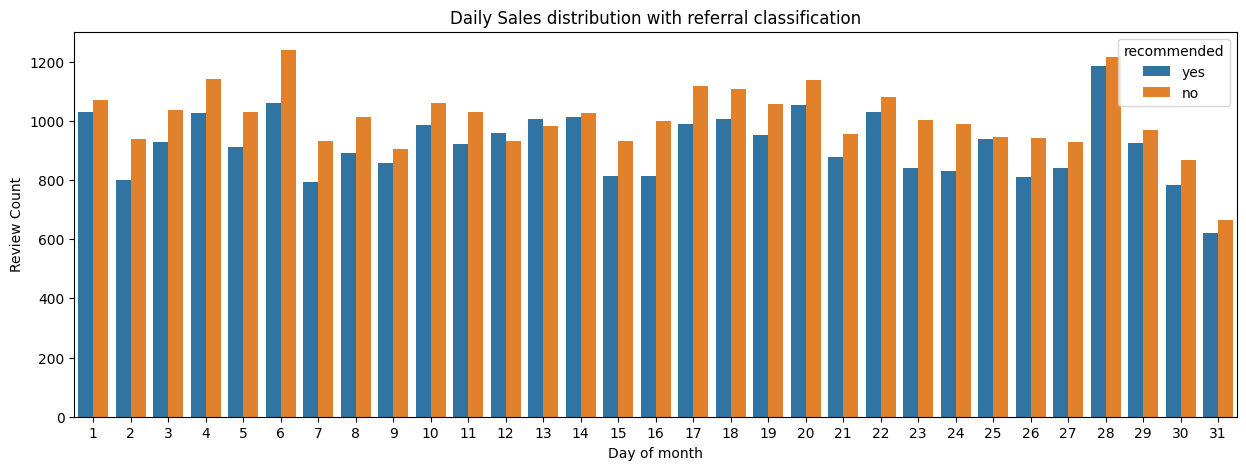

In [ ]:
# Chart - 6 visualization code
sns.countplot(x = df.review_date.dt.day, hue = df.recommended)

plt.title('Daily Sales distribution with referral classification')
plt.xlabel('Day of month')
plt.ylabel('Review Count')
plt.show()

#### Chart - 7

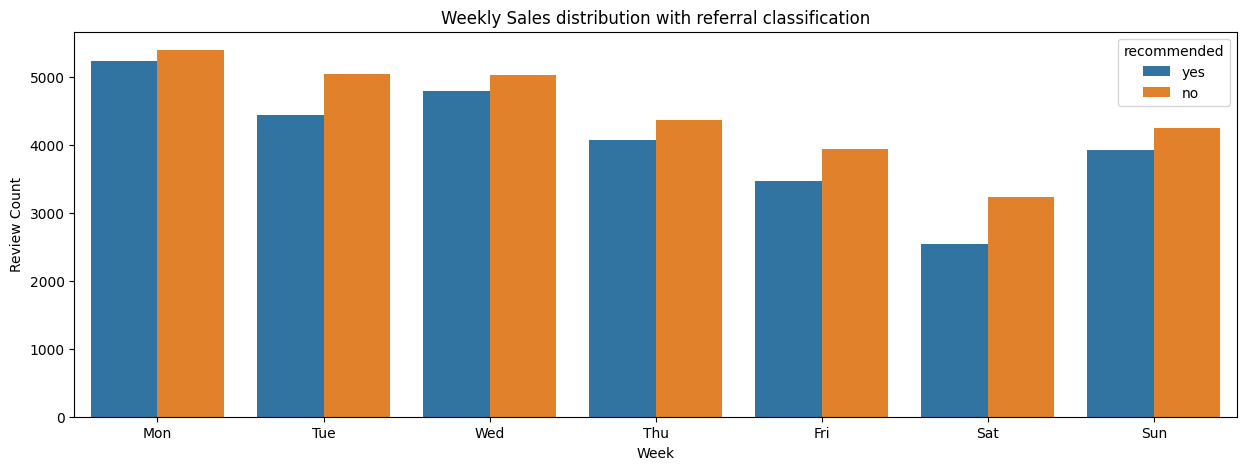

In [ ]:
# Chart - 7 visualization code
sns.countplot(x = df.review_date.dt.weekday, hue = df.recommended)

plt.xticks([0,1,2,3,4,5,6],[ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Weekly Sales distribution with referral classification')
plt.xlabel('Week')
plt.ylabel('Review Count')
plt.show()

#### Chart - 8

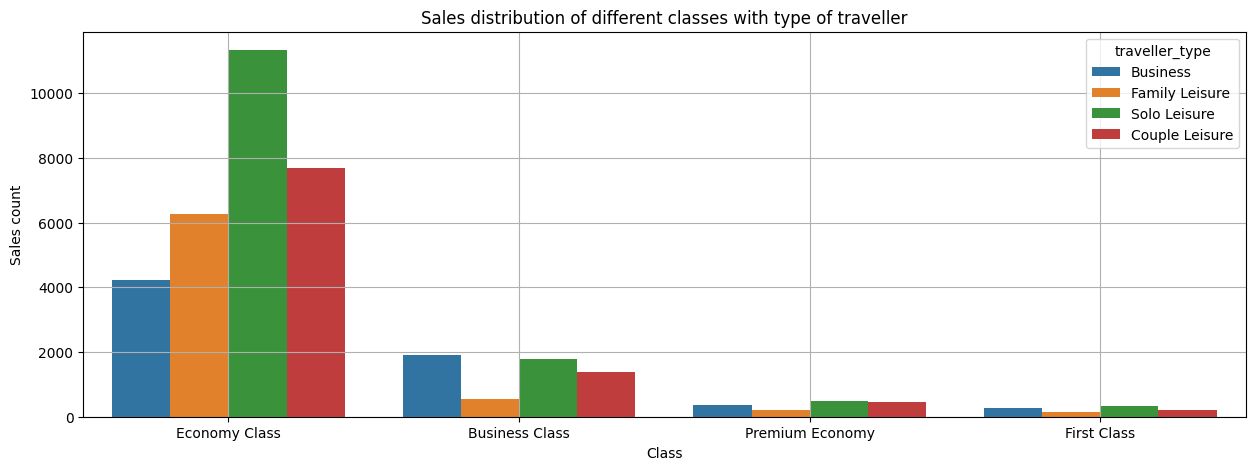

In [ ]:
# Chart - 8 visualization code
sns.countplot(x = df.cabin, hue = df.traveller_type)

plt.title('Sales distribution of different classes with type of traveller')
plt.xlabel('Class')
plt.ylabel('Sales count')
plt.grid()
plt.show()

- Solo leisure are the most common type traveller that can be seen across all classes.
- Economy class has the heighest number of sales as it has most number of availability.

#### Chart - 9 - Correlation Heatmap

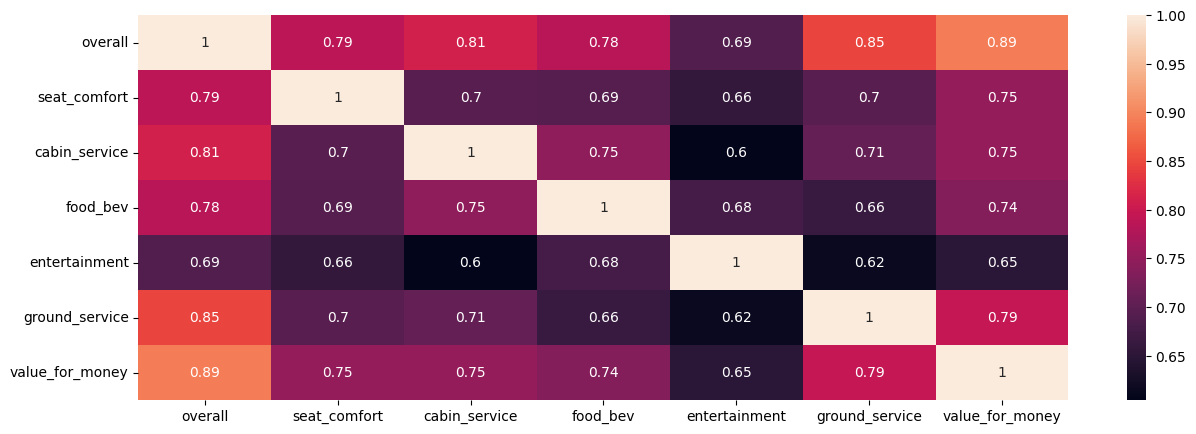

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(abs(df.corr()), annot = True)
plt.show()

- Overall feature is highly correlated to almost all the other features.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
df.shape

(61162, 13)

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

airline            65947
overall            67855
review_date        65947
customer_review    65947
traveller_type     92117
cabin              68569
seat_comfort       71191
cabin_service      71157
food_bev           79264
entertainment      87679
ground_service     92514
value_for_money    67897
recommended        67454
dtype: int64

In [ ]:
df

,airline,overall,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,2019-05-08,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,2019-05-07,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,2019-05-07,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,2019-05-06,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,2019-05-06,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61157,Ukraine International,NaN,2007-01-21,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
61158,Ukraine International,NaN,2006-12-15,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
61159,Ukraine International,NaN,2006-05-19,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
61160,Ukraine International,NaN,2006-04-29,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
df.traveller_type.describe()

count            37540
unique               4
top       Solo Leisure
freq             13935
Name: traveller_type, dtype: object

In [ ]:
df.traveller_type.value_counts()

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

In [ ]:
df.cabin.value_counts()

Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64

In [ ]:
# filling nan values for cabin and traveller_type features with heighest frequency values

df.fillna({'cabin' : 'Economy Class',
           'traveller_type' : 'Solo Leisure'}, inplace = True)

In [ ]:
# Droping null values from overall, recommended and value_for_money since the 2% data loss is negligible.

df = df[(df.overall.notnull()) & (df.recommended.notnull()) & (df.value_for_money.notnull())]

In [ ]:
# Creating a new features of all services and scaling down overall rating feature from 0 to 10 -->  0 to 5

df['avg_rating'] = np.floor((df[['seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money']].sum(axis = 1))/6)

df['scaled_overall'] = round(df.overall/2)

df['difference'] = df.avg_rating - df.scaled_overall                                     # to check distribution

df['sum'] = df[['scaled_overall', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money']].sum(axis = 1)

df['null_count'] = df[['seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money']].isnull().sum(axis = 1)

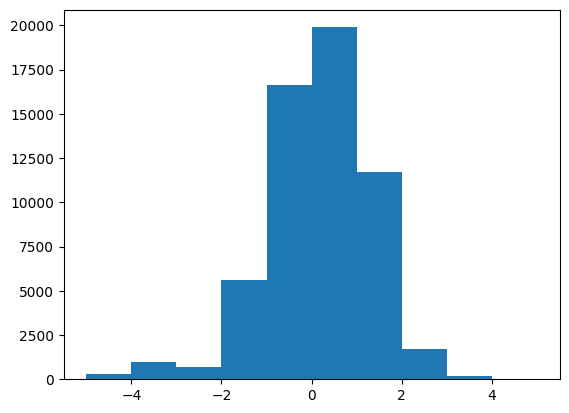

In [ ]:
plt.hist(df.difference)

plt.show()

- Above graph proves that the overall rating is much more like an average of all the ratings of services. Therefore overall rating values can be used for calculating and filling nan values of all the services features.

In [ ]:
df

,airline,overall,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,avg_rating,scaled_overall,difference,sum,null_count
0,Turkish Airlines,7.0,2019-05-08,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes,4.0,4.0,0.0,27.0,0
1,Turkish Airlines,2.0,2019-05-07,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no,2.0,1.0,1.0,10.0,0
2,Turkish Airlines,3.0,2019-05-07,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no,2.0,2.0,0.0,14.0,0
3,Turkish Airlines,10.0,2019-05-06,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes,5.0,5.0,0.0,34.0,0
4,Turkish Airlines,1.0,2019-05-06,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no,1.0,0.0,1.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61143,Ukraine International,4.0,2010-06-29,Kiev - Frankfurt - Kiev weekly normally with L...,NaN,Business Class,NaN,NaN,NaN,NaN,NaN,4.0,yes,1.0,2.0,-1.0,6.0,5
61144,Ukraine International,8.0,2010-05-11,Berlin-Kiev-Berlin B737-400. The return flight...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,4.0,yes,1.0,4.0,-3.0,8.0,5
61145,Ukraine International,5.0,2010-05-10,Some 5 flights within couple months. Most of t...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,4.0,no,1.0,2.0,-1.0,6.0,5
61146,Ukraine International,8.0,2010-04-29,Vienna-Kiev return in Coach. Check in fine at ...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,4.0,yes,1.0,4.0,-3.0,8.0,5


In [ ]:
df[['seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money']].melt()

,variable,value
0,seat_comfort,4.0
1,seat_comfort,4.0
2,seat_comfort,1.0
3,seat_comfort,4.0
4,seat_comfort,1.0
...,...,...
346531,value_for_money,4.0
346532,value_for_money,4.0
346533,value_for_money,4.0
346534,value_for_money,4.0


In [ ]:
dfm = df.copy()
dfd = df.copy()


In [ ]:
df.fillna(
    {'seat_comfort':np.ceil(df['sum']/(7-df['null_count'])),
     'cabin_service':np.ceil(df['sum']/(7-df['null_count'])),
     'food_bev':np.ceil(df['sum']/(7-df['null_count'])),
     'entertainment':np.ceil(df['sum']/(7-df['null_count'])),
     'ground_service':np.ceil(df['sum']/(7-df['null_count']))}
    , inplace = True)

In [ ]:
dfm.fillna(
    {'seat_comfort':np.median(df.seat_comfort),
     'cabin_service':np.median(df.cabin_service),
     'food_bev':np.median(df.food_bev),
     'entertainment':np.median(df.entertainment),
     'ground_service':np.median(df.ground_service)}
    , inplace = True)
dfd.fillna(
    {'seat_comfort':np.ceil(np.mean(df.seat_comfort)),
     'cabin_service':np.ceil(np.mean(df.cabin_service)),
     'food_bev':np.ceil(np.mean(df.food_bev)),
     'entertainment':np.ceil(np.mean(df.entertainment)),
     'ground_service':np.ceil(np.mean(df.ground_service))}
    , inplace = True)

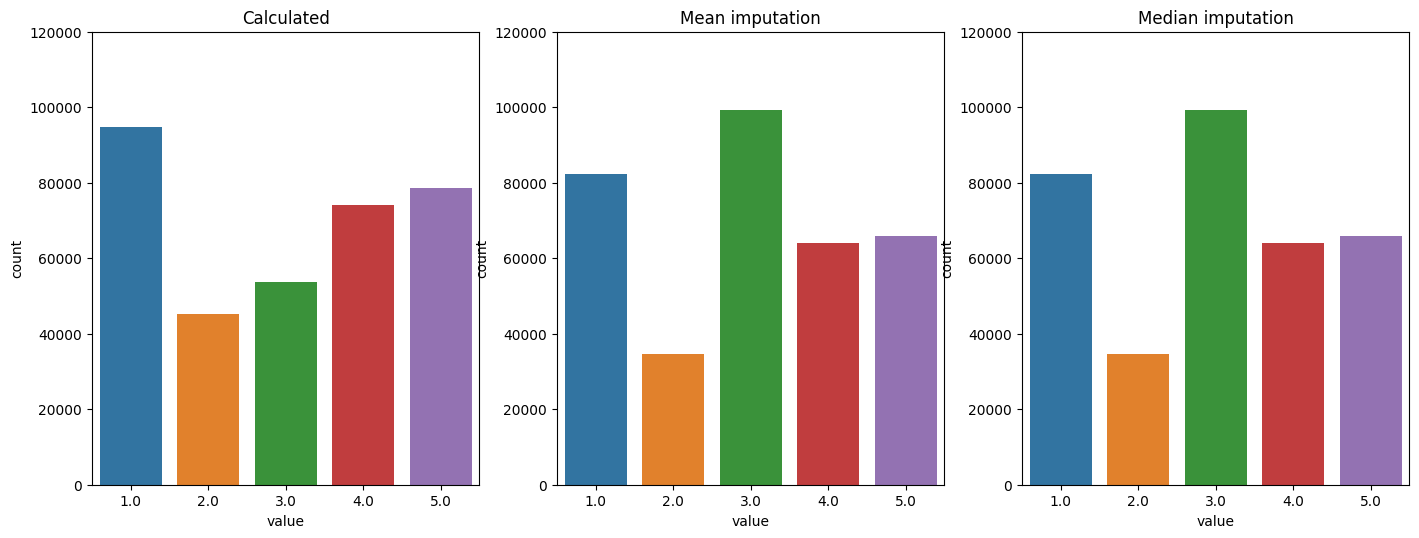

In [ ]:
plt.figure(figsize=(17,20))

plt.subplot(3,3,1)
sns.countplot(x = 'value', data = df[['seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money']].melt())
plt.ylim(0,120000)
plt.title('Calculated')


plt.subplot(3,3,2)
sns.countplot(x = 'value', data = dfd[['seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money']].melt())
plt.ylim(0,120000)
plt.title('Mean imputation')


plt.subplot(3,3,3)
sns.countplot(x = 'value', data = dfm[['seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money']].melt())
plt.ylim(0,120000)
plt.title('Median imputation')

plt.show()

In [ ]:
df.isnull().sum()

airline            0
overall            0
review_date        0
customer_review    0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
avg_rating         0
scaled_overall     0
difference         0
sum                0
null_count         0
dtype: int64

In [ ]:
df.columns

Index(['airline', 'overall', 'review_date', 'customer_review',
       'traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended',
       'avg_rating', 'scaled_overall', 'difference', 'sum', 'null_count'],
      dtype='object')

In [ ]:
df.reset_index(inplace = True)

df.drop(['avg_rating', 'scaled_overall', 'difference', 'sum', 'null_count', 'index'], axis = 1, inplace = True)

In [ ]:
df

,airline,overall,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,2019-05-08,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,2019-05-07,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,2019-05-07,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,2019-05-06,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,2019-05-06,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57751,Ukraine International,4.0,2010-06-29,Kiev - Frankfurt - Kiev weekly normally with L...,Solo Leisure,Business Class,3.0,3.0,3.0,3.0,3.0,4.0,yes
57752,Ukraine International,8.0,2010-05-11,Berlin-Kiev-Berlin B737-400. The return flight...,Solo Leisure,Economy Class,4.0,4.0,4.0,4.0,4.0,4.0,yes
57753,Ukraine International,5.0,2010-05-10,Some 5 flights within couple months. Most of t...,Solo Leisure,Economy Class,3.0,3.0,3.0,3.0,3.0,4.0,no
57754,Ukraine International,8.0,2010-04-29,Vienna-Kiev return in Coach. Check in fine at ...,Solo Leisure,Economy Class,4.0,4.0,4.0,4.0,4.0,4.0,yes


#### What all missing value imputation techniques have you used and why did you use those techniques?

- Cabin feature is a categorical feature which holds unique values. It mainly represents the class od cabin. Filling the nan values with "Economy Class" since it is the most frequently observed value from that column.
- Perfoming same operation on traveller type feature.
- Almot all types of service ratings contain nan values.
- Dropping nan values from features overall and value_for_money.
- Filling nan values of other service ratings by taking the average of existing rating values present in that row.


### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df

,airline,overall,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,2019-05-08,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,2019-05-07,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,2019-05-07,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,2019-05-06,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,2019-05-06,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57751,Ukraine International,4.0,2010-06-29,Kiev - Frankfurt - Kiev weekly normally with L...,Solo Leisure,Business Class,3.0,3.0,3.0,3.0,3.0,4.0,yes
57752,Ukraine International,8.0,2010-05-11,Berlin-Kiev-Berlin B737-400. The return flight...,Solo Leisure,Economy Class,4.0,4.0,4.0,4.0,4.0,4.0,yes
57753,Ukraine International,5.0,2010-05-10,Some 5 flights within couple months. Most of t...,Solo Leisure,Economy Class,3.0,3.0,3.0,3.0,3.0,4.0,no
57754,Ukraine International,8.0,2010-04-29,Vienna-Kiev return in Coach. Check in fine at ...,Solo Leisure,Economy Class,4.0,4.0,4.0,4.0,4.0,4.0,yes


##### What all outlier treatment techniques have you used and why did you use those techniques?

- All the features present in the given data frame are categorical in nature, hence no outlier treatment is required.


### 3. Categorical Encoding

In [ ]:
df.columns

Index(['airline', 'overall', 'review_date', 'customer_review',
       'traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = 'first', sparse = False)

pd.DataFrame(encoder.fit_transform(df[['traveller_type', 'cabin', 'recommended']]),
             columns = encoder.get_feature_names_out(['traveller_type', 'cabin', 'recommended']))

,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,recommended_yes
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
57751,0.0,0.0,1.0,0.0,0.0,0.0,1.0
57752,0.0,0.0,1.0,1.0,0.0,0.0,1.0
57753,0.0,0.0,1.0,1.0,0.0,0.0,0.0
57754,0.0,0.0,1.0,1.0,0.0,0.0,1.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***6. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***